Data for this research project comes from a few sources:

- Zillow: https://www.zillow.com/research/data/
- Census.gov

Download all of the data here: https://cl.ly/3v1Y1Y0Q1L2t

1. price-to-rent-ratio.csv
1. rental-1-room.csv
1. rental-2-rooms.csv
1. rental-condo.csv
1. rental-median.csv
1. sales-median-listing.csv
1. sales-median-sold.csv
1. tx-vs-usa-economic-indicators.csv
1. usa-key-economic-indicators.csv

Interesting analysis done by The Economist: http://www.economist.com/blogs/graphicdetail/2016/08/daily-chart-20

In [4]:
import numpy as np
import pandas as pd
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
% matplotlib inline

In [5]:
# This ratio is first calculated at the individual home level,
# where the estimated home value is divided by 12 times its estimated monthly rent price.
# The median of all home-level price-to-rent ratios for a given region is then calculated.

# Carl note: Example for a $100k home with $1,000 monthly rent: 100000/(12*1000) = 8.3
# If you could rent this same home for $1,200 instead, you'd get a ratio of 6.9
# Takeaway: A lower ratio is better!

price_to_rent = pd.read_csv('./data/price-to-rent-ratio.csv')

In [6]:
price_to_rent.head(3)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2010-10,2010-11,2010-12,...,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02
0,274772,Northeast Dallas,Dallas,TX,Dallas-Fort Worth,Dallas,1,10.00,9.91,9.73,...,11.72,11.77,12.14,12.17,12.21,12.34,12.54,12.61,12.57,12.64
1,192689,Paradise,Las Vegas,NV,Las Vegas,Clark,2,8.65,8.58,8.47,...,12.71,12.77,13.05,13.11,13.20,13.26,13.33,13.42,13.52,13.63
2,112345,Maryvale,Phoenix,AZ,Phoenix,Maricopa,3,5.57,5.51,5.17,...,10.79,10.87,11.19,11.26,11.42,11.53,11.71,11.90,12.05,12.14


In [12]:
price_to_rent_values = price_to_rent.drop(price_to_rent.columns[[0, 1, 2, 4, 5, 6]], axis=1)

In [38]:
avg_ptr_by_state = price_to_rent_values.groupby(['State']).mean()
avg_ptr_by_state.head(3)

,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,...,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02
State,,,,,,,,,,,,,,,,,,,,,
AK,NaN,NaN,NaN,13.045000,12.548929,12.044643,11.950000,11.908571,11.908571,11.736071,...,11.991786,12.007500,12.053929,12.073214,12.110714,12.172500,12.334286,12.477857,12.582143,12.604643
AL,9.182391,9.130652,9.027609,8.956413,8.892717,8.906413,8.817174,8.756304,8.685109,8.675217,...,8.632935,8.674130,8.683804,8.672609,8.711848,8.771630,8.863043,8.939130,8.994674,8.988478
AR,10.559231,10.493846,10.404615,10.451154,10.433462,10.161154,9.909615,9.592692,9.629615,9.581923,...,9.085385,9.107692,9.143462,9.075385,9.156538,9.188077,9.198846,9.239615,9.310385,9.358846


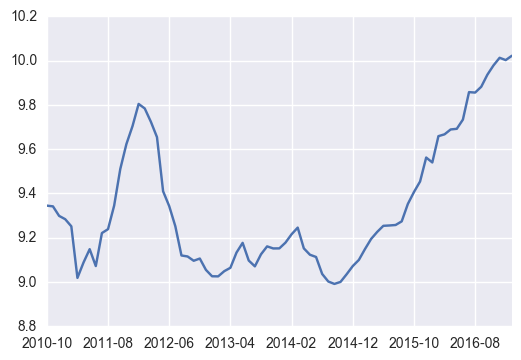

In [42]:
avg_ptr_by_state.loc["TX"].plot()

In [54]:
avg_ptr_by_state['2017-02'].copy().sort_values()

State
MS     6.229259
MI     6.820800
OH     8.356572
MD     8.487143
IN     8.614087
AL     8.988478
SC     9.056500
AR     9.358846
MO     9.411308
WI     9.565541
KS     9.714211
VT     9.810000
NE     9.983600
GA    10.001892
TX    10.021692
PA    10.123959
KY    10.538571
RI    10.629545
FL    10.638245
NH    10.690000
IL    11.236467
CT    11.286379
NC    11.449242
TN    11.492022
LA    11.579541
NJ    11.820769
MN    12.053483
AK    12.604643
NM    13.542542
ID    13.664348
AZ    14.013391
UT    14.103889
NV    14.465263
DE    14.470000
VA    14.793118
MT    15.363500
MA    15.669467
CO    15.779107
DC    16.827079
NY    16.924207
OR    17.111776
WA    17.558258
CA    18.832180
HI    24.592222
Name: 2017-02, dtype: float64

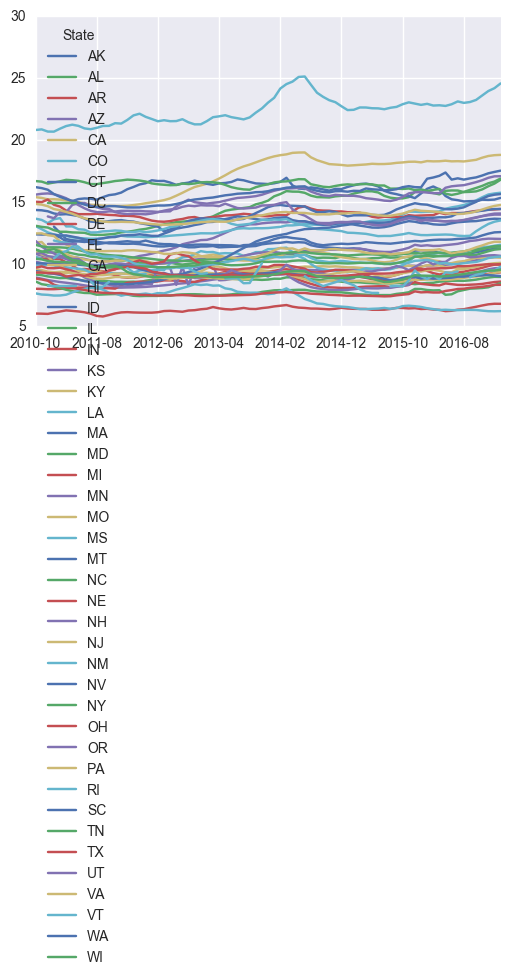

In [74]:
# Transpose our data so we can graph over time
avg_ptr_by_state.T.plot()

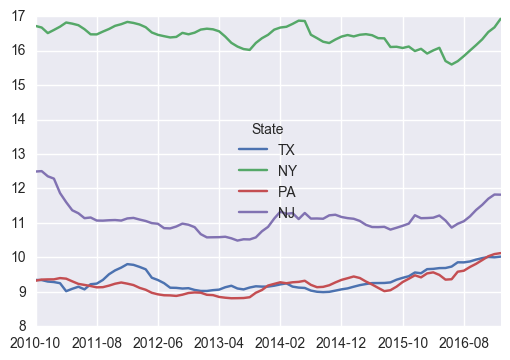

In [80]:
# Select specific states
avg_ptr_by_state.loc[["TX", "NY", "PA", "NJ"]].T.plot()